In [1]:
import xarray as xr
import pandas as pd
%matplotlib inline

In [3]:
# Use this code when on your desktop if you have the file on your machine
# the data can be found at http://glasslab.engr.ccny.cuny.edu/u/hannah/eas213/landsat_hires.nc
# ds = xr.open_dataset("../data/landsat_hires.nc")

In [ ]:
# use this code when on binder (interactive version)
# quilt is an alternative way of accessing the data
# need to first install quilt: pip install quilt
# then install data: quilt install story645/eas213
from quilt.data.story645.eas213 import landsat_hires
ds = xr.open_dataset(landsat_hires._data())

In [4]:
ds

<xarray.Dataset>
Dimensions:            (time: 21, x: 921, y: 815)
Coordinates:
    lat                (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 ...
    lon                (time, y, x) float64 -74.07 -74.07 -74.07 -74.06 ...
  * time               (time) datetime64[ns] 2014-04-10 2014-04-26 ...
Dimensions without coordinates: x, y
Data variables:
    Blue               (time, y, x) float64 0.0991 0.0868 0.0807 0.0784 ...
    Thermal Radiances  (time, y, x) float64 8.023 7.835 7.669 7.523 7.41 ...
    UV                 (time, y, x) float64 0.1126 0.1031 0.0981 0.0957 ...
    Green              (time, y, x) float64 0.0774 0.0633 0.0564 0.0533 ...
    NIR                (time, y, x) float64 0.0529 0.0 0.0 0.0 0.0 0.0 0.0 ...
    Red                (time, y, x) float64 0.0694 0.0424 0.0278 0.0234 ...
Attributes:
    _NCProperties:  version=1|netcdflibversion=4.6.1|hdf5libversion=1.10.2

# Let's look at that variation a bit more:

In [5]:
import landsat_sample_functions as lf
tempK = lf.BT(ds['Thermal Radiances'], 10.9, 1)
tempF = 9/5*(tempK - 273) + 32

In [30]:
seasonsT = tempF.groupby('time.season').mean('time')
seasonsT.coords

Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

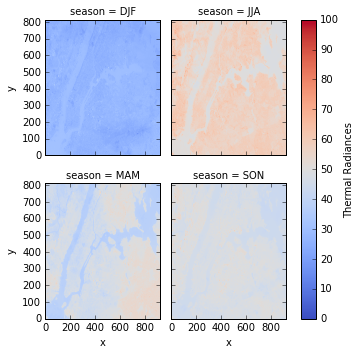

In [31]:
# http://xarray.pydata.org/en/stable/plotting.html
_ = seasonsT.plot(x='x', y='y', col='season', col_wrap=2,
                 cmap='coolwarm',vmin=0, vmax=100, 
                 figsize=(5,5))

In [32]:
seasonsS = tempF.groupby('time.season').mean(['x', 'y'])
seasonsS.coords

Coordinates:
  * time     (time) datetime64[ns] 2014-04-10 2014-04-26 2014-06-29 ...
    season   (time) |S3 'MAM' 'MAM' 'JJA' 'JJA' 'JJA' 'SON' 'SON' 'SON' ...

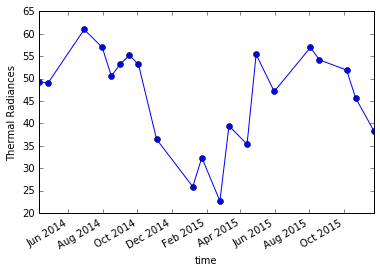

In [38]:
_ = seasonsS.plot(marker='o')

In [39]:
tempFdf = tempF.to_dataframe()['Thermal Radiances'].to_frame().reset_index()
tempFdf.head()

,time,y,x,Thermal Radiances
0,2014-04-10,0,0,47.724198
1,2014-04-10,0,1,46.251754
2,2014-04-10,0,2,44.934494
3,2014-04-10,0,3,43.762168
4,2014-04-10,0,4,42.845685


![boxplot](../data/boxplot.svg)
By Jhguch at en.wikipedia, CC BY-SA 2.5, https://commons.wikimedia.org/w/index.php?curid=14524285

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np 

In [43]:
#750615 - lat*lon
labels = tempFdf['time'][::750615].dt.strftime("%d/%m/%y").tolist()

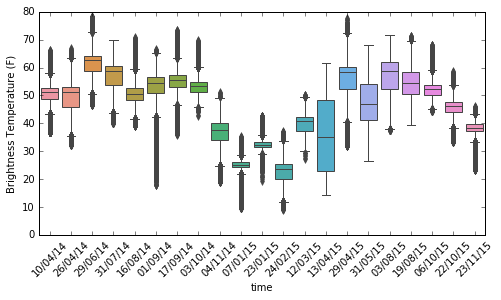

In [45]:
fig, ax = plt.subplots(figsize=(8,4))
g = sns.boxplot(x = 'time', y='Thermal Radiances', 
                data=tempFdf, ax=ax)
_ = ax.set_ylabel("Brightness Temperature (F)")
_ = g.set_xticklabels(labels, rotation=45)

# NDVI:
Using the july 17a and july17b notebooks as reference:
1. compute NDVI
2. compute the temporal and spatial means
3. compute the monthly NDVI
4. compute the seasonal NDVI